Подключим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox

Загрузим данные из временных рядов в датафреймы и проанализируем структуру

In [2]:
df_fembirth = pd.read_csv('daily-total-female-births-in-cal.csv')
df_airpass = pd.read_csv('international-airline-passengers.csv')
df_airtemp = pd.read_csv('mean-monthly-air-temperature-deg.csv')
df_boston = pd.read_csv('monthly-boston-armed-robberies-j.csv')
df_sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
df_djclose =  pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [3]:
print(f'df_fembirth: {df_fembirth.columns}')
print(f'df_airpass: {df_airpass.columns}')
print(f'df_airtemp: {df_airtemp.columns}')
print(f'df_boston: {df_boston.columns}')
print(f'df_sales: {df_sales.columns}')
print(f'df_djclose: {df_djclose.columns}')

df_fembirth: Index(['Date', 'Count'], dtype='object')
df_airpass: Index(['Month', 'Count'], dtype='object')
df_airtemp: Index(['Month', 'Deg'], dtype='object')
df_boston: Index(['Month', 'Count'], dtype='object')
df_sales: Index(['Month', 'Count'], dtype='object')
df_djclose: Index(['Week', 'Close'], dtype='object')


Сформируем словарь, в котором ключом будет номер временного ряда, а значением - его название

In [4]:
series_name = {
    'Ряд 1': 'Daily total female births in California',
    'Ряд 2': 'International airline passengers',
    'Ряд 3': 'Mean monthly air temperature deg',
    'Ряд 4': 'Monthly boston armed robberies',
    'Ряд 5': 'Monthly sales of company x',
    'Ряд 6': 'Weekly closings of the dowjones'
    }

Сформируем  словарь, в котором ключом будет номер временного ряда из словаря временных рядов, а значением - сам временной ряд

In [5]:
all_series = {
    'Ряд 1': df_fembirth['Count'], 
    'Ряд 2': df_airpass['Count'], 
    'Ряд 3': df_airtemp['Deg'], 
    'Ряд 4': df_boston['Count'], 
    'Ряд 5': df_sales['Count'], 
    'Ряд 6': df_djclose['Close']
    }

Сформулируем гипотезу о стационарности ряда.
H0: Ряд является стационарным
H1: Ряд не является стационаным

Визуализируем загруженные временные ряды и проведем визуальный анализ

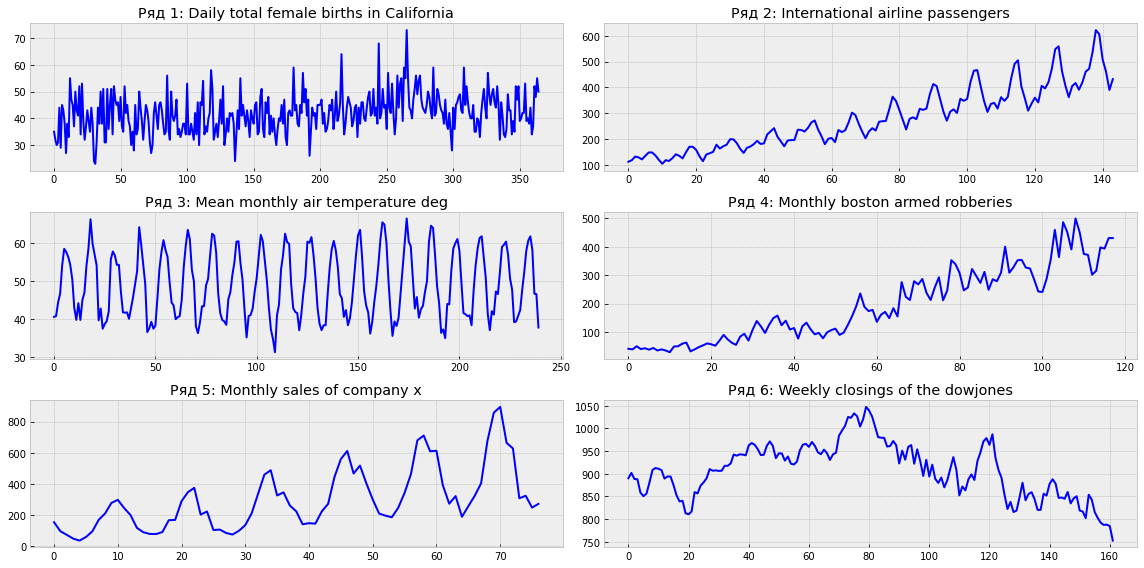

In [7]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key + ': ' +series_name[key])
        
    plt.tight_layout()

In [8]:
def visual_analasys(*param):
    rez_out = {}
    rez_out['season'] = param[0] 
    rez_out['cycle'] = param[1]
    rez_out['trend'] = param[2] 
    rez_out['stationar'] = param[3]
    return rez_out

In [9]:
series = {}

series['Ряд 1'] = visual_analasys('unseason', 'uncycle', 'no trend', 'stationar')
series['Ряд 2'] = visual_analasys('season', 'uncycle', 'trend', 'no stationar')
series['Ряд 3'] = visual_analasys('unseason', 'uncycle', 'no trend', 'no stationar')
series['Ряд 4'] = visual_analasys('season', 'uncycle', 'trend', 'no stationar')
series['Ряд 5'] = visual_analasys('season', 'uncycle', 'trend', 'no stationar')
series['Ряд 6'] = visual_analasys('unseason', 'cycle', 'no trend', 'no stationar')
print('Визуальное исследование временных рядов на стационарность, сезонность, цикличность, тренд')
pd.DataFrame(series)

Визуальное исследование временных рядов на стационарность, сезонность, цикличность, тренд


,Ряд 1,Ряд 2,Ряд 3,Ряд 4,Ряд 5,Ряд 6
season,unseason,season,unseason,season,season,unseason
cycle,uncycle,uncycle,uncycle,uncycle,uncycle,cycle
trend,no trend,trend,no trend,trend,trend,no trend
stationar,stationar,no stationar,no stationar,no stationar,no stationar,no stationar


Вывод: В результате проведенного визуального анализа H1 опровергается только для ряда 1. Значит, ряд 1  относится к стационарным, остальные ряды стационарными не являются. Результаты анализа приведены выше. 

Проведем инструментальное исследование временных рядов на стационарность с помощью теста Дики-Фуллера

In [10]:
#DF test
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

In [11]:
df = {}
for i in all_series:    
    df[i] = test_stationarity(all_series[i])
print('Results of Dickey-Fuller Test:')
pd.DataFrame(df)

Results of Dickey-Fuller Test:


,Ряд 1,Ряд 2,Ряд 3,Ряд 4,Ряд 5,Ряд 6
Test Statistic,-4.808291,0.815369,-3.255492,1.001102,0.654715,-1.314625
p-value,0.000052,0.991880,0.016989,0.994278,0.988889,0.622455
#Lags Used,6.000000,13.000000,14.000000,11.000000,12.000000,0.000000
Number of Observations Used,358.000000,130.000000,225.000000,106.000000,64.000000,161.000000
Critical Value (1%),-3.448749,-3.481682,-3.459752,-3.493602,-3.536928,-3.471633
Critical Value (5%),-2.869647,-2.884042,-2.874473,-2.889217,-2.907887,-2.879665
Critical Value (10%),-2.571089,-2.578770,-2.573663,-2.581533,-2.591493,-2.576434


In [ ]:
Результаты анализа на стационарность с помощью метода Дики-Фуллера также для ряда 1  
не опровергают альтернативную гипотезу, так как у этого ряда p-value<0.05. Но и Ряд 3 показал 
p-value<0.05. Требуется проведение дополнительных исследований с помощью корреляционного анализа.

Для анализа на сезонность посчитаем автокорреляцию и визуализируем с помощью кареллограмм. Так как не получилось подключить библиотеку statsmodels, посчитаем автокорреляцию с помощью функции auto_corr()

In [12]:
series_corr = {}
def auto_corr(values):
    dataframe = pd.concat([values.shift(12), values.shift(6), values.shift(3), values.shift(2),
                               values.shift(1), values], axis=1)
    dataframe.columns = ['t', 't+1', 't+2', 't+3','t+6','t+12']
    return dataframe.corr()

for i in all_series:
    val = pd.DataFrame(all_series[i].values)
    series_corr[i] = auto_corr(val)     

In [13]:
for i in series_corr:
    print(i + ": " + series_name[i])
    print(series_corr[i],'\n')

Ряд 1: Daily total female births in California
             t       t+1       t+2       t+3       t+6      t+12
t     1.000000  0.102215  0.057374  0.045446  0.049909 -0.020129
t+1   0.102215  1.000000  0.112809  0.100888  0.101756  0.093725
t+2   0.057374  0.112809  1.000000  0.210867  0.152335  0.109906
t+3   0.045446  0.100888  0.210867  1.000000  0.213821  0.154437
t+6   0.049909  0.101756  0.152335  0.213821  1.000000  0.217877
t+12 -0.020129  0.093725  0.109906  0.154437  0.217877  1.000000 

Ряд 2: International airline passengers
             t       t+1       t+2       t+3       t+6      t+12
t     1.000000  0.778091  0.821849  0.881472  0.949238  0.990527
t+1   0.778091  1.000000  0.846777  0.810070  0.789839  0.783919
t+2   0.821849  0.846777  1.000000  0.961133  0.894473  0.837395
t+3   0.881472  0.810070  0.961133  1.000000  0.960249  0.895675
t+6   0.949238  0.789839  0.894473  0.960249  1.000000  0.960195
t+12  0.990527  0.783919  0.837395  0.895675  0.960195  1.000000 


Вывод:

Расчет коэффициентов автокорреляции показывает, что временные ряды 1 и 6 не подвержены сезонным колебаниям. При этом ряд 6 на малых лагах показывает наличие сезонных движений, который с увеличением лага теряют свою значимость. А для рядов 2,3, 4, 5 характерны сезонные колебания. Причем, ряды 2, 3 и 5 наиболее выраженную сезонность показывают на лагах Т+6  Т+12. Аналогичные выводы о сезонности рядов были сделаны при визуальном исследовании. Исключение составил ряд 3, который при подсчете автокорреляции показал сезонность на лаге Т+12.

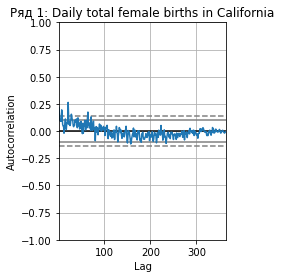

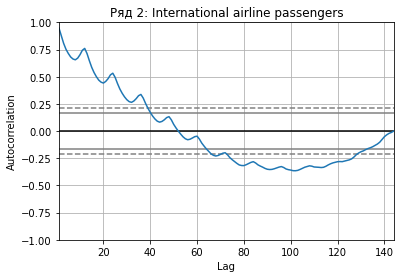

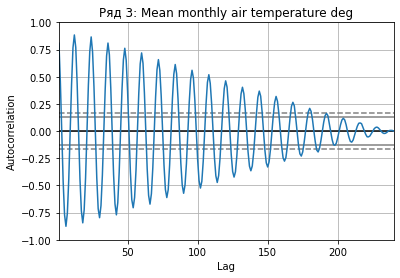

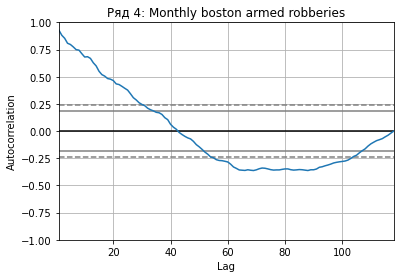

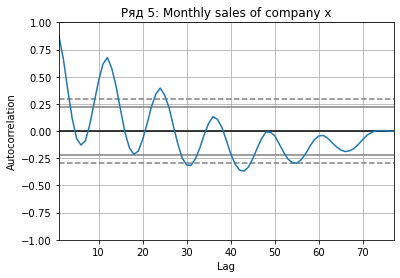

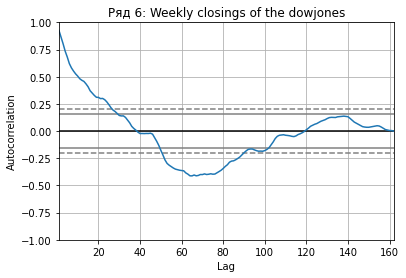

In [14]:
plt.figure(figsize=(3, 4))
for i in all_series:       
    x = pd.plotting.autocorrelation_plot(all_series[i])
    x.plot()
    x.set_title(i + ': ' +series_name[i])    
    plt.show()

In [ ]:
Таким образом, необходимо все временные ряды за исключением ряда 1 привести к стационарным.
Для этого сначала в рядах 2,3,4,5 уберем сезонность, а затем продифференцируем все ряды, кроме ряда 1

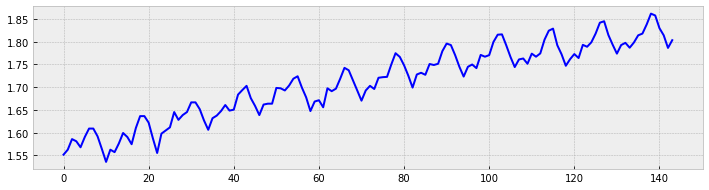

In [16]:
all_series['Ряд 2'] =boxcox(all_series['Ряд 2'],0)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 2'], color='blue')

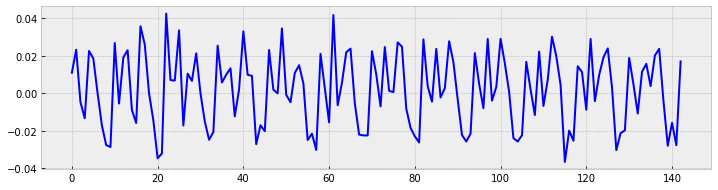

In [17]:
all_series['Ряд 2'] = np.diff(all_series['Ряд 2'], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 2'], color='blue')

In [ ]:
for i in series_corr:
    print(i + ": " + series_name[i])
    print(series_corr[i],'\n')

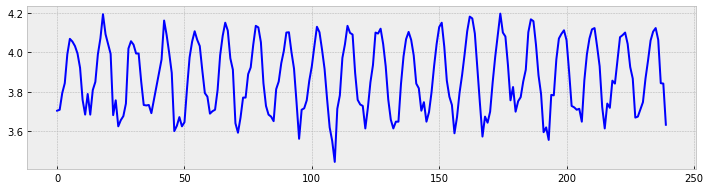

In [18]:
all_series['Ряд 3'] =boxcox(all_series['Ряд 3'],0)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 3'], color='blue')

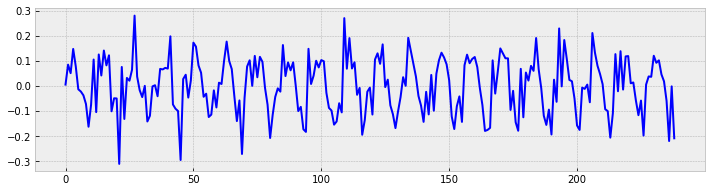

In [19]:
all_series['Ряд 3'] = np.diff(all_series['Ряд 3'], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 3'], color='blue')

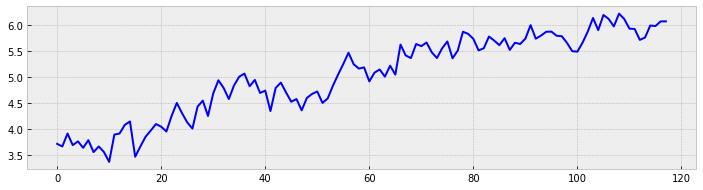

In [20]:
all_series['Ряд 4'] =boxcox(all_series['Ряд 4'],0)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 4'], color='blue')

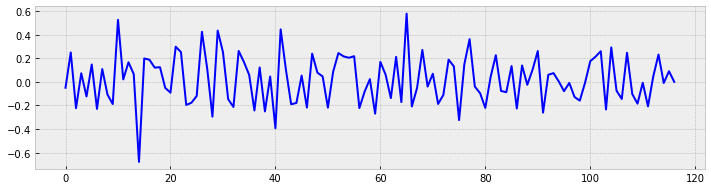

In [21]:
all_series['Ряд 4'] = np.diff(all_series['Ряд 4'], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 4'], color='blue')

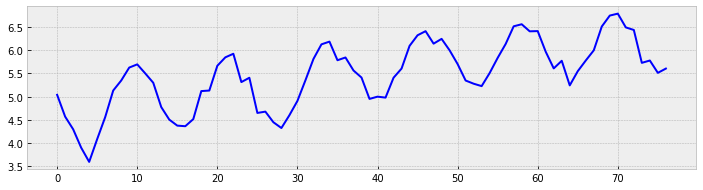

In [22]:
all_series['Ряд 5'] =boxcox(all_series['Ряд 5'],0)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 5'], color='blue')

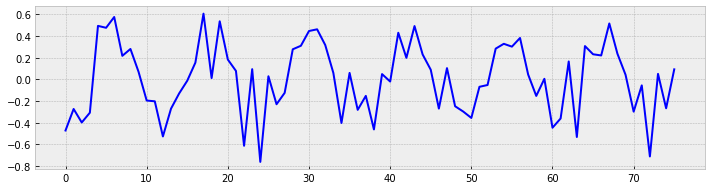

In [23]:
all_series['Ряд 5'] = np.diff(all_series['Ряд 5'], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 5'], color='blue')

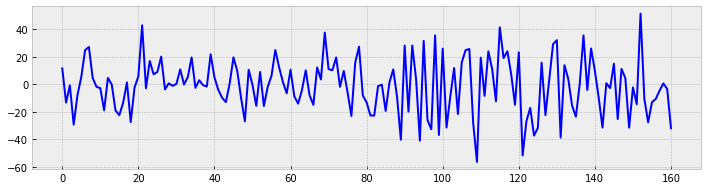

In [24]:
all_series['Ряд 6'] = np.diff(all_series['Ряд 6'], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(12, 3))
        plt.plot(all_series['Ряд 6'], color='blue')

In [61]:
df = {}
for i in all_series:    
    df[i] = test_stationarity(all_series[i])
print('Results of Dickey-Fuller Test 2:')
pd.DataFrame(df)

Results of Dickey-Fuller Test 2:


,Ряд 1,Ряд 2,Ряд 3,Ряд 4,Ряд 5,Ряд 6
Test Statistic,-4.808291,-2.717131,-9.824011e+00,-7.601792e+00,-3.135644,-1.302521e+01
p-value,0.000052,0.071121,5.246133e-17,2.378602e-11,0.024025,2.407586e-24
#Lags Used,6.000000,14.000000,1.400000e+01,3.000000e+00,11.000000,0.000000e+00
Number of Observations Used,358.000000,128.000000,1.260000e+02,1.130000e+02,64.000000,1.600000e+02
Critical Value (1%),-3.448749,-3.482501,-3.483346e+00,-3.489590e+00,-3.536928,-3.471896e+00
Critical Value (5%),-2.869647,-2.884398,-2.884766e+00,-2.887477e+00,-2.907887,-2.879780e+00
Critical Value (10%),-2.571089,-2.578960,-2.579156e+00,-2.580604e+00,-2.591493,-2.576495e+00


Тест Дики-Фуллера, проведенный после математических преобразований числовых последовательностей временных рядов опровергает гипотезу H1 о нестационарности изучаемых рядов, так как почти для всех рядов получено значение  p-value < 0.05. Исключение составил Ряд 2, но его p-value = 0.07 и близко к граничному.

Таким образом, основная цель домашнего задания - сделать ряды стационарными - достигнута